In [1]:
from sklearn import mixture
import pickle
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import itertools
from sklearn.decomposition import PCA
%matplotlib inline

In [2]:

def plot_results(X, Y_, means, covariances, index, title, plot_gmm = True):
    plt.figure(figsize=(15,25))
    splot = plt.subplot(3, 1, 1 + index)
    color_iter = itertools.cycle(["navy", "c", "cornflowerblue", "gold", "darkorange"])
    if plot_gmm:
        for i, (mean, covar, color) in enumerate(zip(means, covariances, color_iter)):
            v, w = np.linalg.eigh(covar)
            v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
            u = w[0] / np.linalg.norm(w[0])
            # as the DP will not use every component it has access to
            # unless it needs it, we shouldn't plot the redundant
            # components.
#             print(Y_)
            if not np.any(Y_ == i):
                continue
            plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], 0.8, color=color)

            # Plot an ellipse to show the Gaussian component
            angle = np.arctan(u[1] / u[0])
            angle = 180.0 * angle / np.pi  # convert to degrees
            ell = mpl.patches.Ellipse(mean, v[0], v[1], angle=180.0 + angle, color=color)
            ell.set_clip_box(splot.bbox)
            ell.set_alpha(0.5)
            splot.add_artist(ell)
    else:
        plt.scatter(X[:, 0], X[:, 1], 0.8, color="c")
        

#     plt.xlim(-9.0, 5.0)
#     plt.ylim(-3.0, 6.0)
    plt.xticks(())
    plt.yticks(())
    plt.title(title)
    plt.show()

### Comparing GMM vs Dirichlet Process on cluster of data

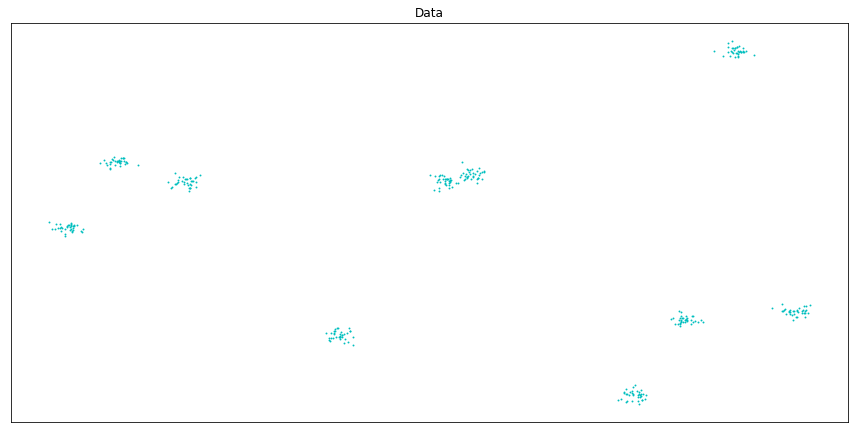

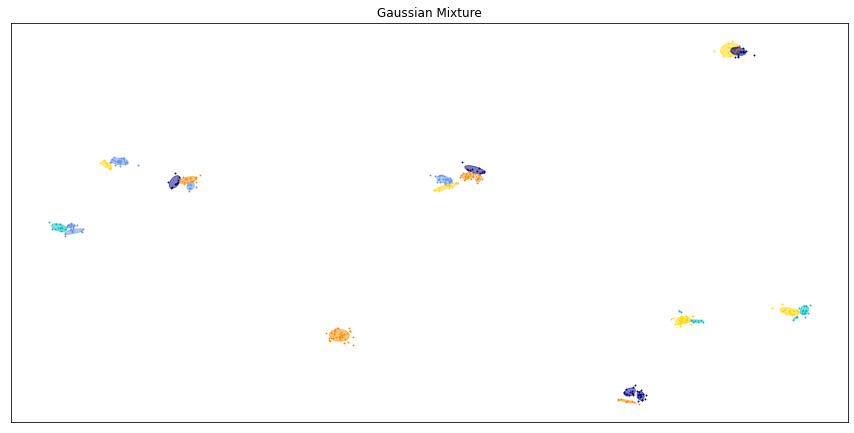

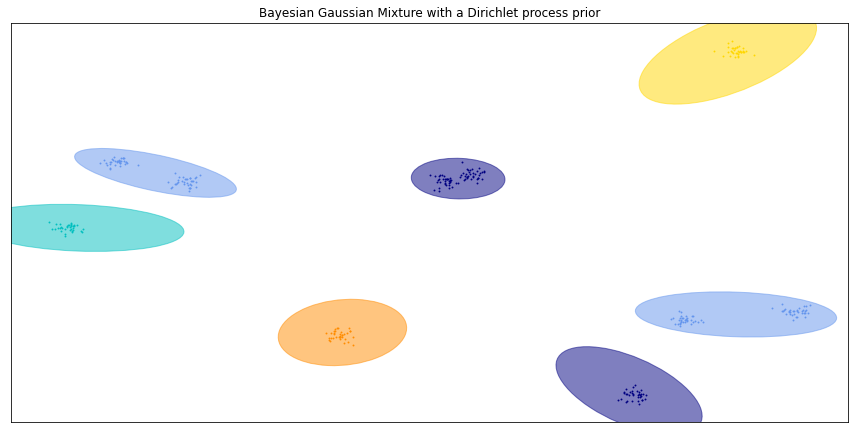

In [3]:
from sklearn.datasets import make_blobs

X_temp, y_temp = make_blobs(n_samples=350, centers=10, cluster_std=0.15)

plot_results(
    X_temp,
    None,
    None,
    None,
    1,
    "Data",
    False
)

# Fit a Gaussian mixture with EM using five components
gmm = mixture.GaussianMixture(n_components=25, covariance_type="full", n_init = 5, verbose = 0).fit(X_temp)
plot_results(X_temp, gmm.predict(X_temp), gmm.means_, gmm.covariances_, 0, "Gaussian Mixture")
# plt.show()
# Fit a Dirichlet process Gaussian mixture using five components
dpgmm = mixture.BayesianGaussianMixture(n_components=25, covariance_type="full", n_init = 5, verbose = 0).fit(X_temp)
plot_results(
    X_temp,
    dpgmm.predict(X_temp),
    dpgmm.means_,
    dpgmm.covariances_,
    1,
    "Bayesian Gaussian Mixture with a Dirichlet process prior",
)
# plt.show()
# plt.scatter(X[:, 0], X[:, 1])
plt.show()

## Comparing GMM vs Dirichlet Process for random Data

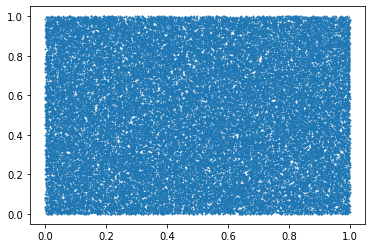

In [30]:
X_tmp = np.random.rand(50000, 2)
plt.scatter(X_tmp[:, 0], X_tmp[:, 1], 0.8, cmap='viridis')
# print(X_tmp.shape, y_tmp.shape)

##### Comment the following if you want to run on uniform data. Comment the top cell if you want to run on normal data

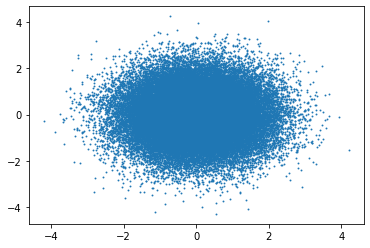

In [36]:
X_tmp = np.random.normal(size = (50000, 2))
plt.scatter(X_tmp[:, 0], X_tmp[:, 1], 0.8, cmap='viridis')
plt.show()

In [37]:
bay_gmm = mixture.BayesianGaussianMixture(n_components=100, n_init=5, verbose = 2, random_state = 1)
bay_gmm.fit(X_tmp)

Initialization 0
  Iteration 10	 time lapse 8.75653s	 ll change 150.80266
  Iteration 20	 time lapse 2.97071s	 ll change 53.70591
  Iteration 30	 time lapse 2.95327s	 ll change 28.39281
  Iteration 40	 time lapse 2.95298s	 ll change 17.94795
  Iteration 50	 time lapse 2.95869s	 ll change 12.83058
  Iteration 60	 time lapse 2.81395s	 ll change 10.74909
  Iteration 70	 time lapse 2.93335s	 ll change 9.12080
  Iteration 80	 time lapse 2.91781s	 ll change 5.81277
  Iteration 90	 time lapse 2.93269s	 ll change 4.72665
  Iteration 100	 time lapse 2.92954s	 ll change 4.40793
Initialization converged: False	 time lapse 35.11957s	 ll -51778.83775
Initialization 1
  Iteration 10	 time lapse 9.95216s	 ll change 148.08732
  Iteration 20	 time lapse 2.99535s	 ll change 53.74997
  Iteration 30	 time lapse 2.82900s	 ll change 28.56398
  Iteration 40	 time lapse 2.90279s	 ll change 17.95144
  Iteration 50	 time lapse 2.92421s	 ll change 12.97295
  Iteration 60	 time lapse 2.91488s	 ll change 10.45207


/usr/local/lib/python3.6/dist-packages/sklearn/mixture/_base.py:269: ConvergenceWarning: Initialization 5 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


BayesianGaussianMixture(n_components=100, n_init=5, random_state=1, verbose=2)

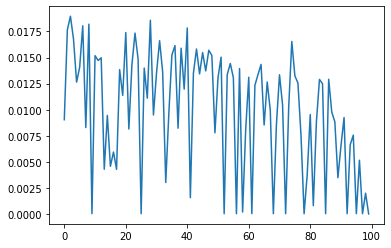

In [38]:
plt.plot(bay_gmm.weights_)

Initialization 0
Initialization converged: True	 time lapse 8.57228s	 ll -2.83418
Initialization 1
Initialization converged: True	 time lapse 9.16689s	 ll -2.83414
Initialization 2
Initialization converged: True	 time lapse 7.43912s	 ll -2.83412
Initialization 3
Initialization converged: True	 time lapse 7.83880s	 ll -2.83469
Initialization 4
Initialization converged: True	 time lapse 7.07871s	 ll -2.83441


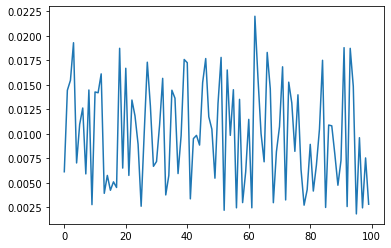

In [39]:
tmp_gmm = mixture.GaussianMixture(n_components=100, random_state=1, verbose = 2, n_init = 5).fit(X_tmp)
plt.plot(tmp_gmm.weights_)

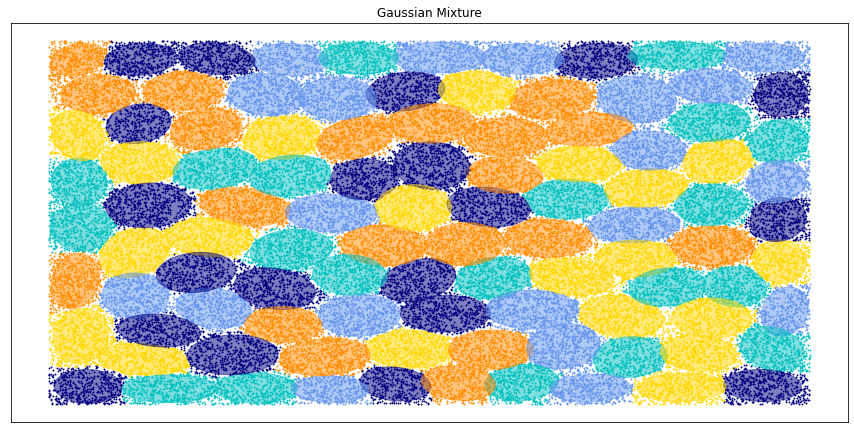

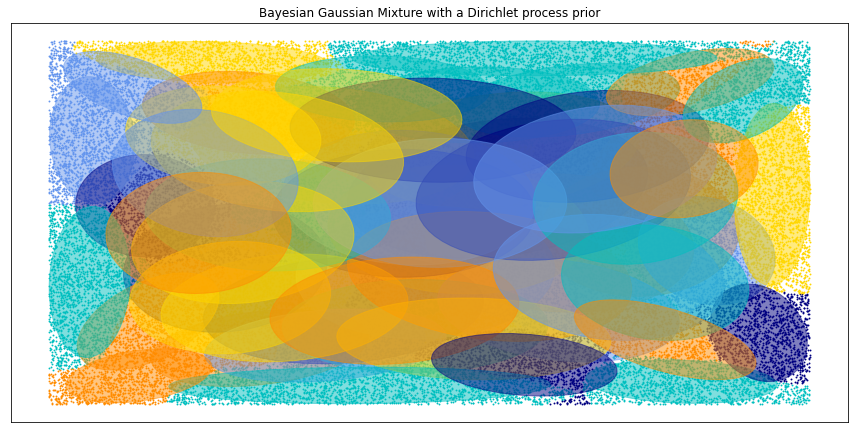

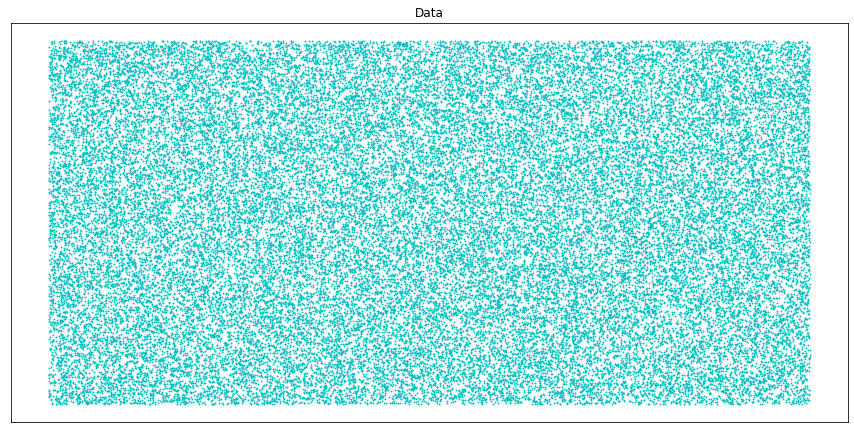

In [35]:
plot_results(X_tmp, tmp_gmm.predict(X_tmp), tmp_gmm.means_, tmp_gmm.covariances_, 0, "Gaussian Mixture")
plot_results(
    X_tmp,
    bay_gmm.predict(X_tmp),
    bay_gmm.means_,
    bay_gmm.covariances_,
    1,
    "Bayesian Gaussian Mixture with a Dirichlet process prior",
)
# plt.show()
# plt.scatter(X[:, 0], X[:, 1])
plot_results(
    X_tmp,
    None,
    None,
    None,
    2,
    "Data",
    False
)
plt.show()

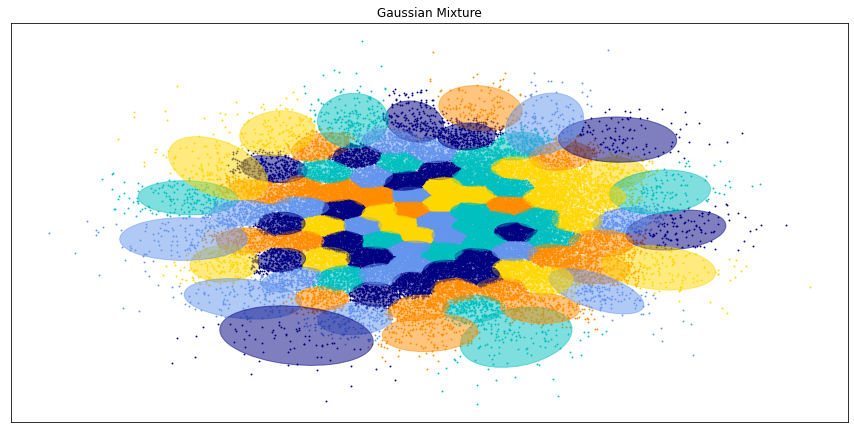

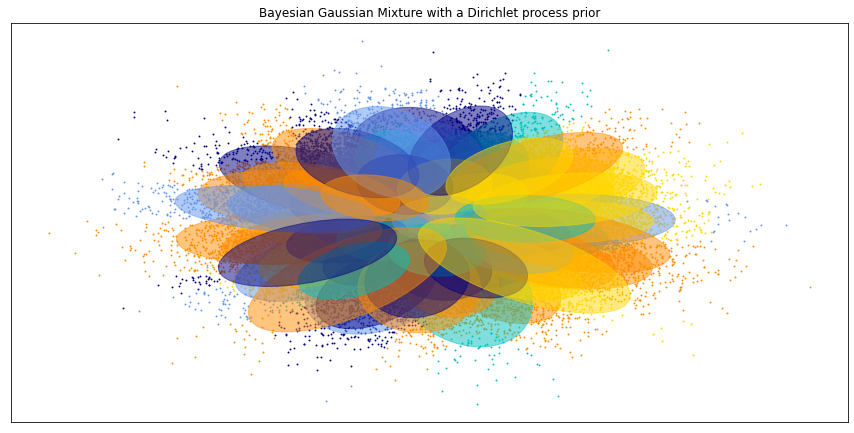

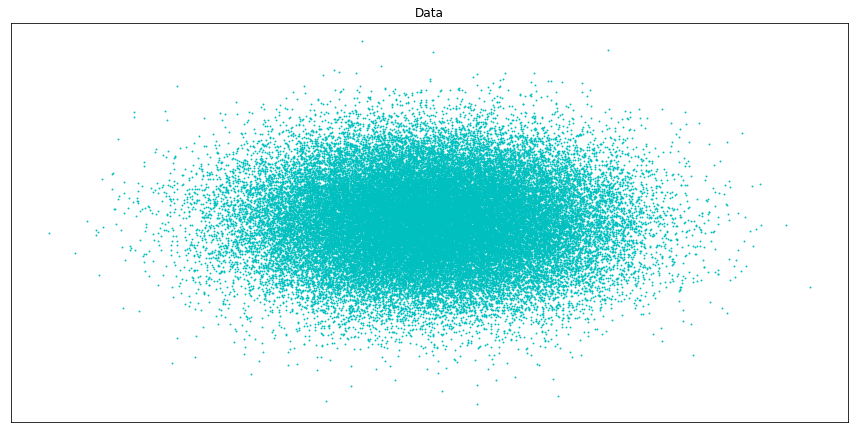

In [40]:
plot_results(X_tmp, tmp_gmm.predict(X_tmp), tmp_gmm.means_, tmp_gmm.covariances_, 0, "Gaussian Mixture")
plot_results(
    X_tmp,
    bay_gmm.predict(X_tmp),
    bay_gmm.means_,
    bay_gmm.covariances_,
    1,
    "Bayesian Gaussian Mixture with a Dirichlet process prior",
)
# plt.show()
# plt.scatter(X[:, 0], X[:, 1])
plot_results(
    X_tmp,
    None,
    None,
    None,
    2,
    "Data",
    False
)
plt.show()

## GMM on Generated Data

In [7]:
X = np.zeros((0, 7))
filenames = []

num_components = 0
paths = []
foldername = "/root/catkin_ws/src/jiaming_manipulation/task_planner/empty_world_trajectory_data/env_000000/"
filenames = sorted(glob.glob("%s/*.p"%foldername))
filenames

['/root/catkin_ws/src/jiaming_manipulation/task_planner/empty_world_trajectory_data/env_000000/path_1.p',
 '/root/catkin_ws/src/jiaming_manipulation/task_planner/empty_world_trajectory_data/env_000000/path_10.p',
 '/root/catkin_ws/src/jiaming_manipulation/task_planner/empty_world_trajectory_data/env_000000/path_100.p',
 '/root/catkin_ws/src/jiaming_manipulation/task_planner/empty_world_trajectory_data/env_000000/path_1000.p',
 '/root/catkin_ws/src/jiaming_manipulation/task_planner/empty_world_trajectory_data/env_000000/path_1001.p',
 '/root/catkin_ws/src/jiaming_manipulation/task_planner/empty_world_trajectory_data/env_000000/path_1002.p',
 '/root/catkin_ws/src/jiaming_manipulation/task_planner/empty_world_trajectory_data/env_000000/path_1003.p',
 '/root/catkin_ws/src/jiaming_manipulation/task_planner/empty_world_trajectory_data/env_000000/path_1004.p',
 '/root/catkin_ws/src/jiaming_manipulation/task_planner/empty_world_trajectory_data/env_000000/path_1005.p',
 '/root/catkin_ws/src/jia

In [8]:
# Create paths from trajectory data
for idx, filename in enumerate(filenames):
    if idx > 0 and idx%500 == 0:
        print(idx)
    with open(filename, "rb") as f:
        path = pickle.load(f, encoding="latin1")['path']
#         path = pickle.load(f)['path']
        paths.append(path)
        path_len = path.shape[0]
        if path_len > num_components:
            num_components = path_len
        X = np.append(X, path, axis=0)


500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500


### GMM on dataset

In [9]:
gmm = mixture.GaussianMixture(n_components=num_components, random_state=0, n_init = 5, verbose = 2).fit(X)

Initialization 0
  Iteration 10	 time lapse 110.19576s	 ll change 0.00265
  Iteration 20	 time lapse 69.40042s	 ll change 0.00169
  Iteration 30	 time lapse 69.66728s	 ll change 0.00139
  Iteration 40	 time lapse 71.17595s	 ll change 0.00118
  Iteration 50	 time lapse 72.31849s	 ll change 0.00101
Initialization converged: True	 time lapse 399.77854s	 ll -11.04427
Initialization 1
  Iteration 10	 time lapse 120.19514s	 ll change 0.00301
  Iteration 20	 time lapse 70.14602s	 ll change 0.00186
  Iteration 30	 time lapse 65.41018s	 ll change 0.00127
  Iteration 40	 time lapse 68.81673s	 ll change 0.00119
  Iteration 50	 time lapse 73.34913s	 ll change 0.00111
  Iteration 60	 time lapse 69.11244s	 ll change 0.00107
  Iteration 70	 time lapse 69.43503s	 ll change 0.00103
Initialization converged: True	 time lapse 550.49059s	 ll -11.01788
Initialization 2
  Iteration 10	 time lapse 138.34373s	 ll change 0.00303
  Iteration 20	 time lapse 72.07138s	 ll change 0.00192
  Iteration 30	 time lapse

In [12]:
edges = []
for idx, path in enumerate(paths):
    if idx % 500 == 0:
        print(idx)
    predicted_distributions = gmm.predict(path)
    if idx%1000 == 0:
        print(predicted_distributions)
    path_len = len(path)
    for idx1, idx2 in zip(range(path_len), range(1, path_len)):
        dist1, dist2 = predicted_distributions[idx1], predicted_distributions[idx2]
        if dist1!=dist2:
            edges.append([dist1, dist2])


0
[ 95  95  95  95  95  95  95  95  95  95  95  95  95  95  95  95  95  95
  95  95  95  95  95  95  95  95  95  95  95  95  95  95  95  95  95  95
  95  95  95  95  95  95  95  95  95  95  95  95  95  95  33  33  33  33
  33  33 100 100 100 100 100 100 100 100 100 100]
500
1000
[110 110 110 110 110 110 110 110 110 110 110 110 110 110 110 110 110 110
 110 110 110 110 110 110 110 110 110 110 110 110 110 110 110 110 110 110
 110 110 110 110 110  43  43]
1500
2000
[46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46 46
 46 46 46 46 46 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88 88
 88 88 88 88 88 88 88 88 29 29 29]
2500
3000
[57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 68 68 68 68 68 68 68 68
 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 36 36 36 36 36 36
 36 36 36 36 36 36 36 36 36 91 91 91 91 29 29 29 29]
3500
4000
[ 57  57  57  57  57  57  57  57  57  39  39  39  39  39  39  39  39  39
  39  39  39  39  39  39  39  39  39  39  39  39 116 116 116 

In [13]:
gmm_name = 'AUG31GMMS/gmm/'

import os
if not os.path.exists(gmm_name):
    os.makedirs(gmm_name)

np.save(gmm_name + 'weights', gmm.weights_, allow_pickle=False)
np.save(gmm_name + 'means', gmm.means_, allow_pickle=False)
np.save(gmm_name + 'covariances', gmm.covariances_, allow_pickle=False)



In [15]:
gmm.weights_.shape

(131,)

### Dirichlet Process on data

In [7]:
dpgmm = mixture.BayesianGaussianMixture(n_components=num_components * 10, random_state=1, verbose=2, n_init = 5).fit(X)

Initialization 0
  Iteration 10	 time lapse 317.59223s	 ll change 4886.17331
  Iteration 20	 time lapse 259.38825s	 ll change 1959.66543
  Iteration 30	 time lapse 258.33546s	 ll change 1524.76516
  Iteration 40	 time lapse 258.29751s	 ll change 822.61138
  Iteration 50	 time lapse 259.13216s	 ll change 822.23246
  Iteration 60	 time lapse 257.67887s	 ll change 519.54664
  Iteration 70	 time lapse 256.02868s	 ll change 279.98679
  Iteration 80	 time lapse 260.96054s	 ll change 162.21780
  Iteration 90	 time lapse 255.75698s	 ll change 314.33205
  Iteration 100	 time lapse 256.44075s	 ll change 191.48644
Initialization converged: False	 time lapse 2639.61149s	 ll -487956.87965
Initialization 1
  Iteration 10	 time lapse 317.12407s	 ll change 5042.97374
  Iteration 20	 time lapse 255.74605s	 ll change 2180.00827
  Iteration 30	 time lapse 260.30126s	 ll change 1149.90569
  Iteration 40	 time lapse 260.97329s	 ll change 1050.08281
  Iteration 50	 time lapse 256.46462s	 ll change 538.79580

/usr/local/lib/python3.6/dist-packages/sklearn/mixture/_base.py:269: ConvergenceWarning: Initialization 5 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


In [9]:
dpgmm_name = 'dpgmm/'

import os
if not os.path.exists(dpgmm_name):
    os.makedirs(dpgmm_name)

np.save(dpgmm_name + 'weights', dpgmm.weights_, allow_pickle=False)
np.save(dpgmm_name + 'means', dpgmm.means_, allow_pickle=False)
np.save(dpgmm_name + 'covariances', dpgmm.covariances_, allow_pickle=False)

0
500
1000
1500
2000
2500
3000


(586159, 2)


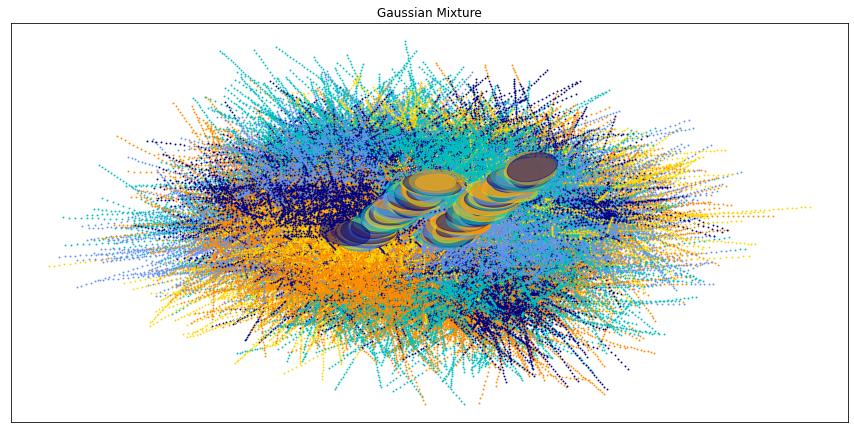

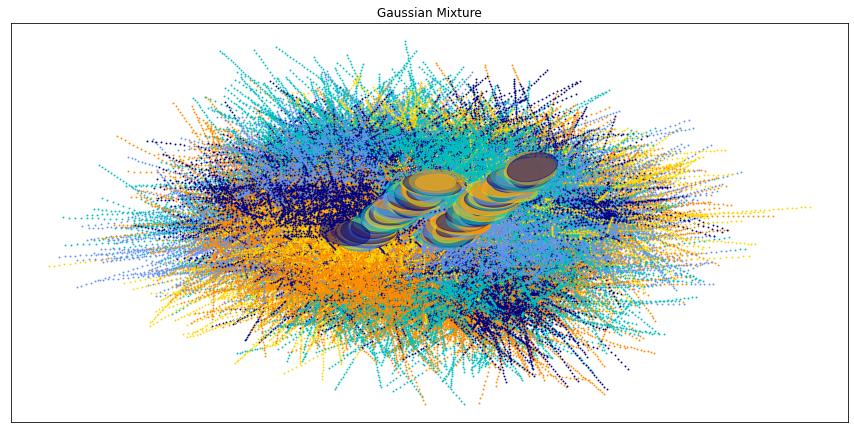

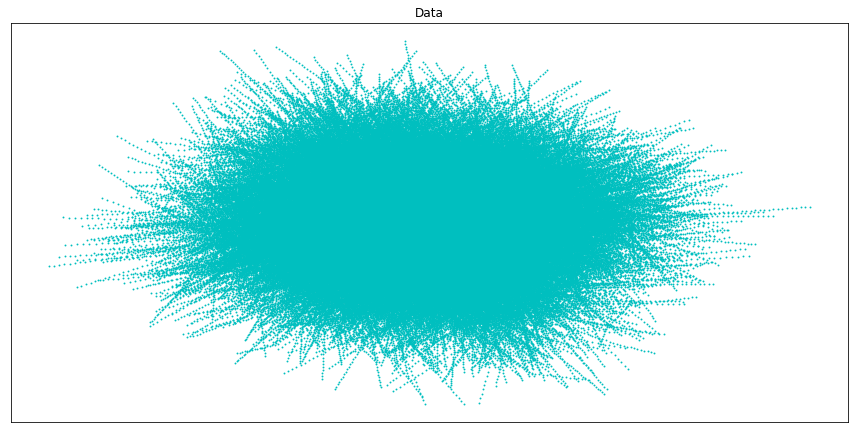

In [16]:
X_pca = PCA(n_components=2).fit_transform(X)
gmm_predicted = gmm.predict(X)
print(X_pca.shape)
plot_results(X_pca[::2], gmm_predicted[::2], PCA(n_components=2).fit_transform(X) , gmm.covariances_, 0, "Gaussian Mixture")
# # plt.show()
# # Fit a Dirichlet process Gaussian mixture using five components
plot_results(X_pca[::2], gmm_predicted[::2], PCA(n_components=2).fit_transform(X) , gmm.covariances_, 0, "Gaussian Mixture")
# # plt.show()
# # plt.scatter(X[:, 0], X[:, 1])
plot_results(X_pca[::2], gmm_predicted[::2], PCA(n_components=2).fit_transform(X) , gmm.covariances_, 0, "Data", False)

plt.show()

## Code to create graph from GMM

In [ ]:
# replace dpgmm with gmm if using GMM
edges = []
for idx, path in enumerate(paths):
    if idx % 500 == 0:
        print(idx)
    predicted_distributions = dpgmm.predict(path)
    path_len = len(path)
    for idx1, idx2 in zip(range(path_len), range(1, path_len)):
        dist1, dist2 = predicted_distributions[idx1], predicted_distributions[idx2]
        if dist1!=dist2:
            edges.append([dist1, dist2])

edges = np.array(edges)
unique, counts = np.unique(edges, return_counts=True, axis = 0)
probabilities = counts / np.sum(counts) # the probability of the edge e_i occuring amongst all edges

np.save("dpgmm/edges.npy", unique)
np.save("dpgmm/edge_probabilities.npy", probabilities)